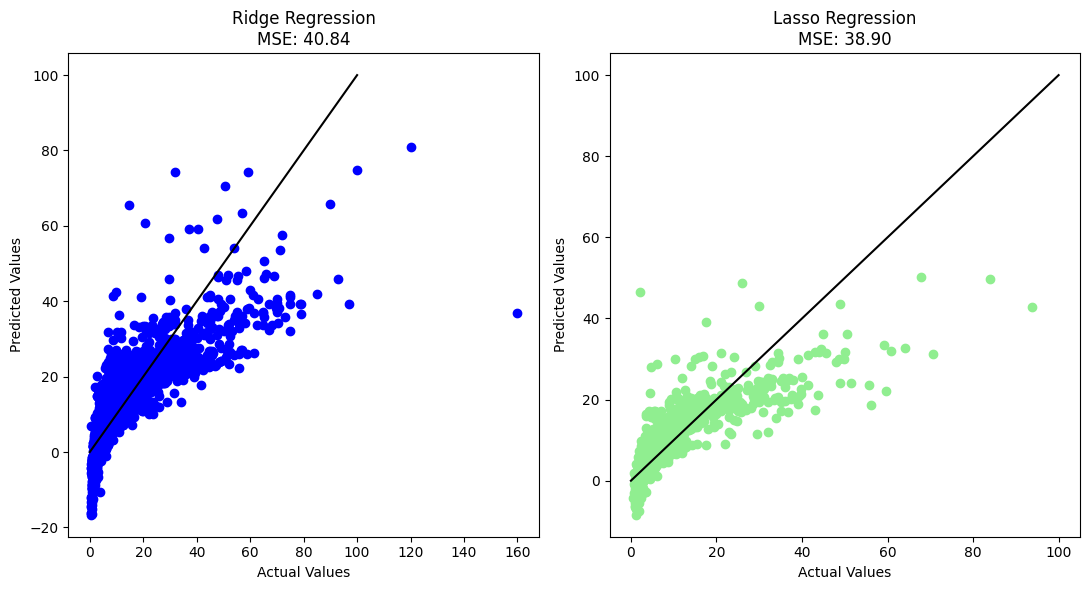

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error
import math
import matplotlib.pyplot as plt

data = pd.read_csv('clean-train.csv')

data = data.drop(['Car', 'Location', 'Fuel', 'Transmission', 'Owner', 'CP'], axis=1)

X = data.drop('SP', axis=1)
y = data['SP']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


alpha = 1.0 
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_train_scaled)
ridge_mse = mean_squared_error(y_train, ridge_predictions)

lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)

train_score = ridge_model.score(X_train_scaled, y_train)
plt.figure(figsize=(11, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_train, ridge_predictions, color='blue')
plt.plot([0, 100], [0, 100], color='black')
plt.title(f"Ridge Regression\nMSE: {ridge_mse:.2f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(1, 2, 2)
plt.scatter(y_test, lasso_predictions, color='lightgreen')
plt.plot([0, 100], [0,100], color='black')
plt.title(f"Lasso Regression\nMSE: {lasso_mse:.2f}")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

C:\Users\P.HEMANTH\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.05955e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


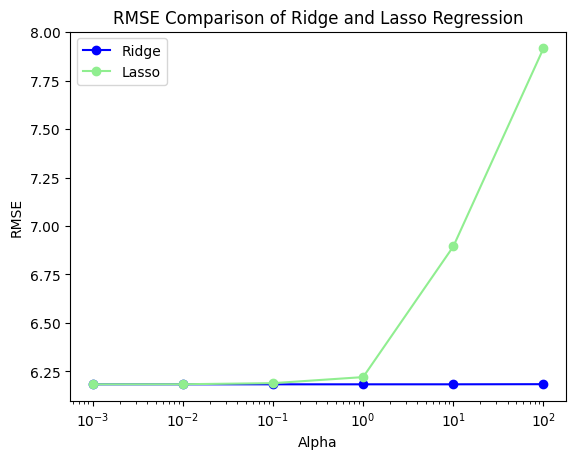

In [2]:
alpha_values = [0.001, 0.01, 0.1, 1, 10, 100]
ridge_mse_values = []
ridge_rmse_values = []
lasso_rmse_values = []
lasso_mse_values = []
for alpha in alpha_values:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    ridge_mse = mean_squared_error(y_test, ridge_pred)
    ridge_mse_values.append(ridge_mse)
    ridge_rmse = math.sqrt(ridge_mse)
    ridge_rmse_values.append(ridge_rmse)
    
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    lasso_mse = mean_squared_error(y_test, lasso_pred)
    lasso_mse_values.append(lasso_mse)
    lasso_rmse =math.sqrt(lasso_mse)
    lasso_rmse_values.append(lasso_rmse)
plt.plot(alpha_values, ridge_rmse_values, color='blue', marker='o', label='Ridge')
plt.plot(alpha_values, lasso_rmse_values, color='lightgreen', marker='o', label='Lasso')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('RMSE')
plt.title('RMSE Comparison of Ridge and Lasso Regression')
plt.legend()
plt.show()